## Muller Brown potential

### Import 

In [1]:
import mlcolvar
import mlcolvar.utils.plot
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from pathlib import Path

/home/lbonati@iit.local/software/anaconda3/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Functions

In [2]:
PLUMED_EXE="plumed"

subprocess.run(f"{PLUMED_EXE}", shell=True)

def clean(folder='./'):
    subprocess.run("rm COLVAR KERNELS bck.* out* histogram* *log potential-coeffs.out.data stats.out", cwd=folder, shell=True)

No protocol specified


Nothing to do. Use 'plumed help' for help


In [3]:
#muller-brown potential

def V(x,y):
    prefactor = 0.15
    A=(-200,-100,-170,15)
    a=(-1,-1,-6.5,0.7)
    b=(0,0,11,0.6)
    c=(-10,-10,-6.5,0.7)
    x0=(1,0,-0.5,-1)
    y0=(0,0.5,1.5,1)
    offset = -146.7

    v = -prefactor*offset
    for i in range(4):
        v += prefactor * A[i]*np.exp( a[i]*(x-x0[i])**2 + b[i]*(x-x0[i])*(y-y0[i]) + c[i]*(y-y0[i])**2 )
    return v

MULLER_BROWN_FORMULA='0.15*(146.7-200*exp(-1*(x-1)^2+0*(x-1)*(y-0)-10*(y-0)^2)-100*exp(-1*(x-0)^2+0*(x-0)*(y-0.5)-10*(y-0.5)^2)-170*exp(-6.5*(x+0.5)^2+11*(x+0.5)*(y-1.5)-6.5*(y-1.5)^2)+15*exp(0.7*(x+1)^2+0.6*(x+1)*(y-1)+0.7*(y-1)^2))'

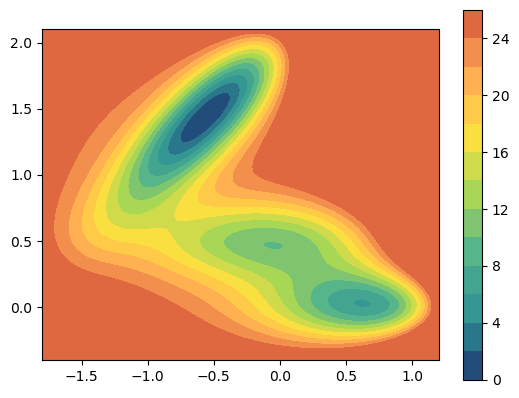

In [4]:
# Visualize
nx, ny = (100, 100)
xlims=(-1.8, 1.2)
ylims=(-0.4, 2.1)
x = np.linspace(xlims[0],xlims[1], nx)
y = np.linspace(ylims[0],ylims[1], ny)
xv, yv = np.meshgrid(x, y)

pot = V(xv,yv)
max_pot = 26
pot[pot>max_pot] = max_pot # np.NaN

fig,ax = plt.subplots(dpi=100)
pp = ax.contourf(xv,yv,pot,16,cmap='fessa') #'Greys_r')
ax.set_aspect('equal')
plt.colorbar(pp,ax=ax)
plt.show()

### unbiased simulations

In [5]:
folder = 'unbiased/state-0/'

Path(folder).mkdir(parents=True, exist_ok=True)

# md_potential for ves_md_linearexpansion (actual potential is in plumed.dat)
with open(folder+"md_potential","w") as f:
    print("""#! FIELDS idx_dim1 idx_dim2 pot.coeffs index description
#! SET type LinearBasisSet
#! SET ndimensions  2
#! SET ncoeffs_total 9 
#! SET shape_dim1  3
#! SET shape_dim2  3
       0       0         0.0000000000000000e+00       0  1*1
#!-------------------
""",file=f)

# md_input for ves_md_linearexpansion
with open(folder+"md_input","w") as f:
    print("""
nstep                   400000
tstep                   0.005
temperature             1.
friction                10.0
random_seed             1  
plumed_input            plumed.dat
dimension               2
replicas                1
basis_functions_1       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
basis_functions_2       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
input_coeffs            md_potential
initial_position        -0.25,1.75
output_potential        out_potential.data
output_potential_grid   100
output_histogram        histogram.data
""",file=f)

with open(folder+"plumed.dat","w") as f:
    print(f"""# vim:ft=plumed
UNITS NATURAL
p: POSITION ATOM=1
ene: CUSTOM ARG=p.x,p.y PERIODIC=NO FUNC={MULLER_BROWN_FORMULA}
pot: BIASVALUE ARG=ene

lwall: LOWER_WALLS ARG=p.x KAPPA=1000 AT=-1.3
uwall: UPPER_WALLS ARG=p.x KAPPA=1000 AT=+1.0

PRINT STRIDE=200 ARG=* FILE=COLVAR
""",file=f)

clean(folder)
subprocess.run(f"{PLUMED_EXE} ves_md_linearexpansion < md_input", cwd=folder, shell=True)

rm: cannot remove 'KERNELS': No such file or directory
rm: cannot remove 'bck.*': No such file or directory
rm: cannot remove 'out*': No such file or directory
rm: cannot remove 'histogram*': No such file or directory
rm: cannot remove 'potential-coeffs.out.data': No such file or directory
rm: cannot remove 'stats.out': No such file or directory
No protocol specified


Replicas                              1
Cores per replica                     1
Number of steps                       400000
Timestep                              0.005000
Temperature                           1.000000
Friction                              10.000000
Random seed                           -1
Dimensions                            2
Basis Function 1                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
Basis Function 2                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
PLUMED input                          plumed.dat
kBoltzmann taken as 1, use NATURAL_UNITS in the plumed input


CompletedProcess(args='plumed ves_md_linearexpansion < md_input', returncode=0)

In [6]:
folder = 'unbiased/state-1/'

Path(folder).mkdir(parents=True, exist_ok=True)

# md_potential for ves_md_linearexpansion (actual potential is in plumed.dat)
with open(folder+"md_potential","w") as f:
    print("""#! FIELDS idx_dim1 idx_dim2 pot.coeffs index description
#! SET type LinearBasisSet
#! SET ndimensions  2
#! SET ncoeffs_total 9 
#! SET shape_dim1  3
#! SET shape_dim2  3
       0       0         0.0000000000000000e+00       0  1*1
#!-------------------
""",file=f)

# md_input for ves_md_linearexpansion
with open(folder+"md_input","w") as f:
    print("""
nstep                   400000
tstep                   0.005
temperature             1.
friction                10.0
random_seed             1  
plumed_input            plumed.dat
dimension               2
replicas                1
basis_functions_1       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
basis_functions_2       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
input_coeffs            md_potential
initial_position        0.5,0.0
output_potential        out_potential.data
output_potential_grid   100
output_histogram        histogram.data
""",file=f)

with open(folder+"plumed.dat","w") as f:
    print(f"""# vim:ft=plumed
UNITS NATURAL
p: POSITION ATOM=1
ene: CUSTOM ARG=p.x,p.y PERIODIC=NO FUNC={MULLER_BROWN_FORMULA}
pot: BIASVALUE ARG=ene

lwall: LOWER_WALLS ARG=p.x KAPPA=1000 AT=-1.3
uwall: UPPER_WALLS ARG=p.x KAPPA=1000 AT=+1.0

PRINT STRIDE=200 ARG=* FILE=COLVAR
""",file=f)

clean(folder)
subprocess.run(f"{PLUMED_EXE} ves_md_linearexpansion < md_input", cwd=folder, shell=True)

rm: cannot remove 'KERNELS': No such file or directory
rm: cannot remove 'bck.*': No such file or directory
rm: cannot remove 'out*': No such file or directory
rm: cannot remove 'histogram*': No such file or directory
rm: cannot remove 'potential-coeffs.out.data': No such file or directory
rm: cannot remove 'stats.out': No such file or directory
No protocol specified


Replicas                              1
Cores per replica                     1
Number of steps                       400000
Timestep                              0.005000
Temperature                           1.000000
Friction                              10.000000
Random seed                           -1
Dimensions                            2
Basis Function 1                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
Basis Function 2                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
PLUMED input                          plumed.dat
kBoltzmann taken as 1, use NATURAL_UNITS in the plumed input


CompletedProcess(args='plumed ves_md_linearexpansion < md_input', returncode=0)

Class 0 dataframe shape:  (2001, 12)
Class 1 dataframe shape:  (2001, 12)

 - Loaded dataframe (4002, 12): ['time', 'p.x', 'p.y', 'p.z', 'ene', 'pot.bias', 'pot.ene_bias', 'lwall.bias', 'lwall.force2', 'uwall.bias', 'uwall.force2', 'labels']
 - Descriptors (4002, 6): ['p.x', 'p.y', 'p.z', 'ene', 'lwall.force2', 'uwall.force2']


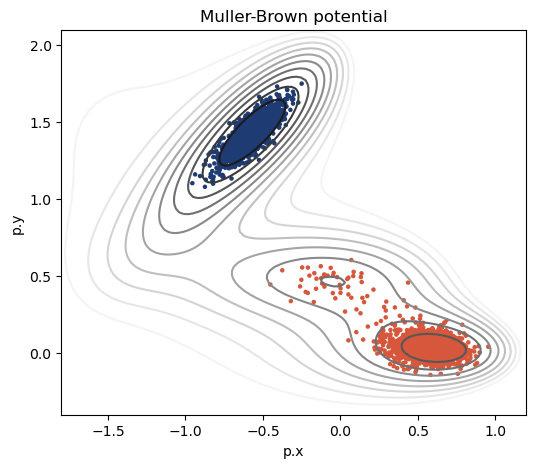

In [7]:
import pandas as pd
from mlcolvar.utils.io import load_dataframe,create_dataset_from_files

#load 
_,colvar = create_dataset_from_files(['unbiased/state-0/COLVAR','unbiased/state-1/COLVAR'], return_dataframe=True)

# plot pot isolines + samples
_, ax = plt.subplots(1, figsize=(6,5), dpi=100)
ax.contour(xv,yv,pot,10,cmap='Greys_r')
ax.set_title(f'Muller-Brown potential')
colvar.plot.scatter('p.x','p.y',c='labels',s=5,cmap='fessa',ax=ax,colorbar=False)
plt.show()

### high-temp simulation

In [8]:
folder = 'unbiased/high-temp/'

Path(folder).mkdir(parents=True, exist_ok=True)

# md_potential for ves_md_linearexpansion (actual potential is in plumed.dat)
with open(folder+"md_potential","w") as f:
    print("""#! FIELDS idx_dim1 idx_dim2 pot.coeffs index description
#! SET type LinearBasisSet
#! SET ndimensions  2
#! SET ncoeffs_total 9 
#! SET shape_dim1  3
#! SET shape_dim2  3
       0       0         0.0000000000000000e+00       0  1*1
#!-------------------
""",file=f)

# md_input for ves_md_linearexpansion
with open(folder+"md_input","w") as f:
    print("""
nstep                   1000000
tstep                   0.005
temperature             2.5
friction                10.0
random_seed             1  
plumed_input            plumed.dat
dimension               2
replicas                1
basis_functions_1       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
basis_functions_2       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
input_coeffs            md_potential
initial_position        0.5,0.0
output_potential        out_potential.data
output_potential_grid   100
output_histogram        histogram.data
""",file=f)

with open(folder+"plumed.dat","w") as f:
    print(f"""# vim:ft=plumed
UNITS NATURAL
p: POSITION ATOM=1
ene: CUSTOM ARG=p.x,p.y PERIODIC=NO FUNC={MULLER_BROWN_FORMULA}
pot: BIASVALUE ARG=ene

lwall: LOWER_WALLS ARG=p.x KAPPA=1000 AT=-1.3
uwall: UPPER_WALLS ARG=p.x KAPPA=1000 AT=+1.0

PRINT STRIDE=200 ARG=* FILE=COLVAR
""",file=f)

clean(folder)
subprocess.run(f"{PLUMED_EXE} ves_md_linearexpansion < md_input", cwd=folder, shell=True)

rm: cannot remove 'KERNELS': No such file or directory
rm: cannot remove 'bck.*': No such file or directory
rm: cannot remove 'out*': No such file or directory
rm: cannot remove 'histogram*': No such file or directory
rm: cannot remove 'potential-coeffs.out.data': No such file or directory
rm: cannot remove 'stats.out': No such file or directory
No protocol specified


Replicas                              1
Cores per replica                     1
Number of steps                       1000000
Timestep                              0.005000
Temperature                           2.500000
Friction                              10.000000
Random seed                           -1
Dimensions                            2
Basis Function 1                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
Basis Function 2                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
PLUMED input                          plumed.dat
kBoltzmann taken as 1, use NATURAL_UNITS in the plumed input


CompletedProcess(args='plumed ves_md_linearexpansion < md_input', returncode=0)

5001


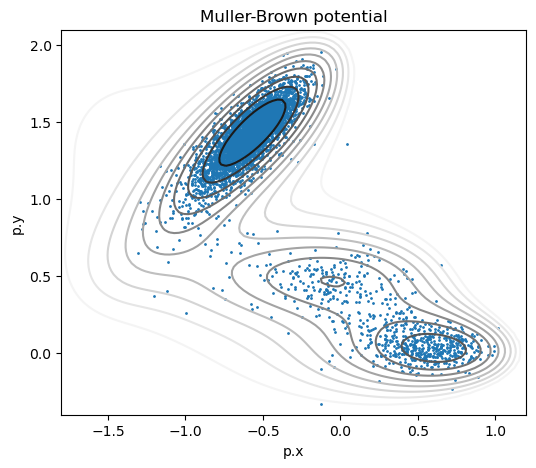

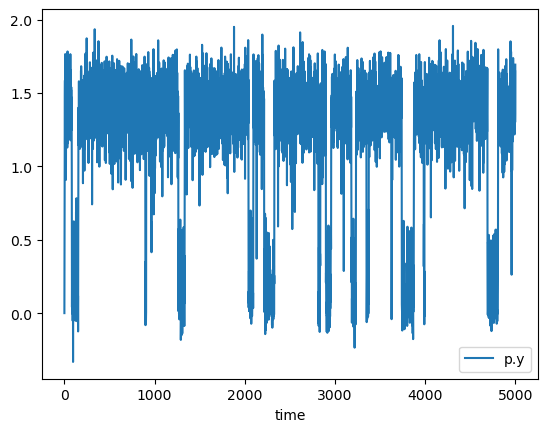

In [9]:
#load 
colvar = load_dataframe(folder+"COLVAR")
print(len(colvar))

# plot pot isolines + samples
_, ax = plt.subplots(1, figsize=(6,5), dpi=100)
ax.contour(xv,yv,pot,10,cmap='Greys_r')
ax.set_title(f'Muller-Brown potential')
colvar.plot.scatter('p.x','p.y',s=1,ax=ax)
plt.show()

colvar.plot('time','p.y')
plt.show()


### opes - x

In [16]:
folder = 'biased/opes-x/'

Path(folder).mkdir(parents=True, exist_ok=True)

# md_potential for ves_md_linearexpansion (actual potential is in plumed.dat)
with open(folder+"md_potential","w") as f:
    print("""#! FIELDS idx_dim1 idx_dim2 pot.coeffs index description
#! SET type LinearBasisSet
#! SET ndimensions  2
#! SET ncoeffs_total 9 
#! SET shape_dim1  3
#! SET shape_dim2  3
       0       0         0.0000000000000000e+00       0  1*1
#!-------------------
""",file=f)

# md_input for ves_md_linearexpansion
with open(folder+"md_input","w") as f:
    print("""
nstep                   40000000
tstep                   0.005
temperature             1.0
friction                10.0
random_seed             1  
plumed_input            plumed.dat
dimension               2
replicas                1
basis_functions_1       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
basis_functions_2       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
input_coeffs            md_potential
initial_position        -0.75,1.5
output_potential        out_potential.data
output_potential_grid   100
output_histogram        histogram.data
""",file=f)

with open(folder+"plumed.dat","w") as f:
    print(f"""# vim:ft=plumed
UNITS NATURAL
p: POSITION ATOM=1
ene: CUSTOM ARG=p.x,p.y PERIODIC=NO FUNC={MULLER_BROWN_FORMULA}
pot: BIASVALUE ARG=ene

opes: OPES_METAD ARG=p.x BARRIER=20 PACE=200

lwall: LOWER_WALLS ARG=p.x KAPPA=1000 AT=-1.3
uwall: UPPER_WALLS ARG=p.x KAPPA=1000 AT=+1.0

PRINT STRIDE=4000 ARG=* FILE=COLVAR
""",file=f)

clean(folder)
subprocess.run(f"{PLUMED_EXE} ves_md_linearexpansion < md_input", cwd=folder, shell=True)

rm: cannot remove 'COLVAR': No such file or directory
rm: cannot remove 'bck.*': No such file or directory
rm: cannot remove 'stats.out': No such file or directory
Invalid MIT-MAGIC-COOKIE-1 key

Replicas                              1
Cores per replica                     1
Number of steps                       20000000
Timestep                              0.005000
Temperature                           1.000000
Friction                              10.000000
Random seed                           -1
Dimensions                            2
Basis Function 1                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
Basis Function 2                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
PLUMED input                          plumed.dat
kBoltzmann taken as 1, use NATURAL_UNITS in the plumed input
Replicas                              1
Cores per replica                     1
Number of steps                       40000000
Timestep                              0.005000
Temperature                           1.000000
Friction                              10.000000
Random seed                           -1
Dimensions                            2
Basis Function 1          

CompletedProcess(args='plumed ves_md_linearexpansion < md_input', returncode=0)

10001


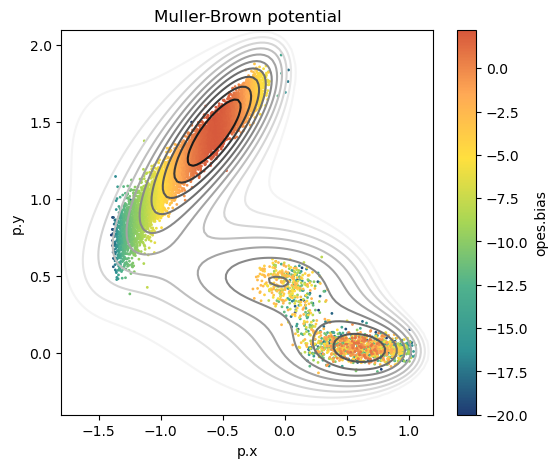

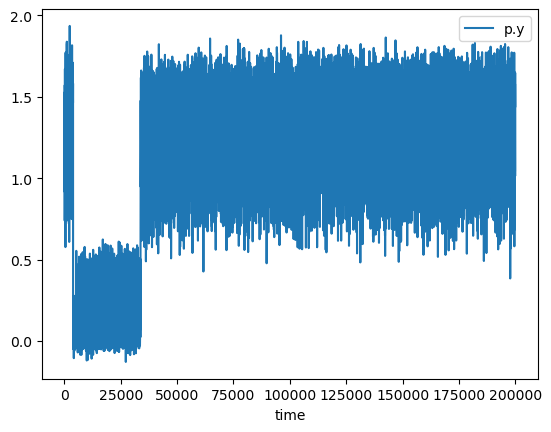

In [17]:
#load 
colvar = load_dataframe(folder+"COLVAR")
print(len(colvar))

# plot pot isolines + samples
_, ax = plt.subplots(1, figsize=(6,5), dpi=100)
ax.contour(xv,yv,pot,10,cmap='Greys_r')
ax.set_title(f'Muller-Brown potential')
colvar.plot.scatter('p.x','p.y',c='opes.bias',cmap='fessa',s=1,ax=ax)
plt.show()

colvar.plot('time','p.y')
plt.show()


### opes - y

In [8]:
folder = 'biased/opes-y/'

Path(folder).mkdir(parents=True, exist_ok=True)

# md_potential for ves_md_linearexpansion (actual potential is in plumed.dat)
with open(folder+"md_potential","w") as f:
    print("""#! FIELDS idx_dim1 idx_dim2 pot.coeffs index description
#! SET type LinearBasisSet
#! SET ndimensions  2
#! SET ncoeffs_total 9 
#! SET shape_dim1  3
#! SET shape_dim2  3
       0       0         0.0000000000000000e+00       0  1*1
#!-------------------
""",file=f)

# md_input for ves_md_linearexpansion
with open(folder+"md_input","w") as f:
    print("""
nstep                   2000000
tstep                   0.005
temperature             1.0
friction                10.0
random_seed             1  
plumed_input            plumed.dat
dimension               2
replicas                1
basis_functions_1       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
basis_functions_2       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
input_coeffs            md_potential
initial_position        -0.75,1.5
output_potential        out_potential.data
output_potential_grid   100
output_histogram        histogram.data
""",file=f)

with open(folder+"plumed.dat","w") as f:
    print(f"""# vim:ft=plumed
UNITS NATURAL
p: POSITION ATOM=1
ene: CUSTOM ARG=p.x,p.y PERIODIC=NO FUNC={MULLER_BROWN_FORMULA}
pot: BIASVALUE ARG=ene

opes: OPES_METAD ARG=p.y BARRIER=10 PACE=200

lwall: LOWER_WALLS ARG=p.x KAPPA=1000 AT=-1.3
uwall: UPPER_WALLS ARG=p.x KAPPA=1000 AT=+1.0

PRINT STRIDE=200 ARG=* FILE=COLVAR
""",file=f)

clean(folder)
subprocess.run(f"{PLUMED_EXE} ves_md_linearexpansion < md_input", cwd=folder, shell=True)

rm: cannot remove 'bck.*': No such file or directory
Invalid MIT-MAGIC-COOKIE-1 key

Replicas                              1
Cores per replica                     1
Number of steps                       2000000
Timestep                              0.005000
Temperature                           1.000000
Friction                              10.000000
Random seed                           -1
Dimensions                            2
Basis Function 1                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
Basis Function 2                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
PLUMED input                          plumed.dat
kBoltzmann taken as 1, use NATURAL_UNITS in the plumed input


CompletedProcess(args='plumed ves_md_linearexpansion < md_input', returncode=0)

10001


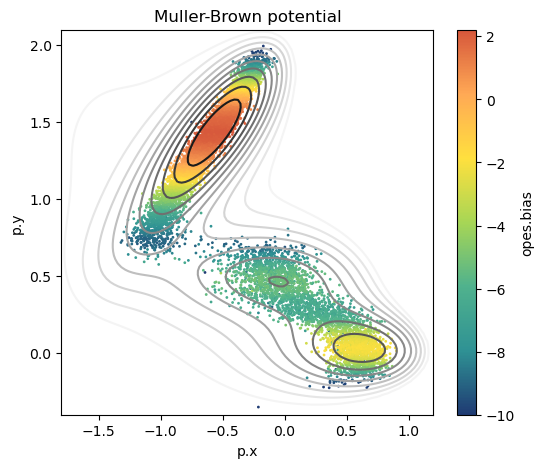

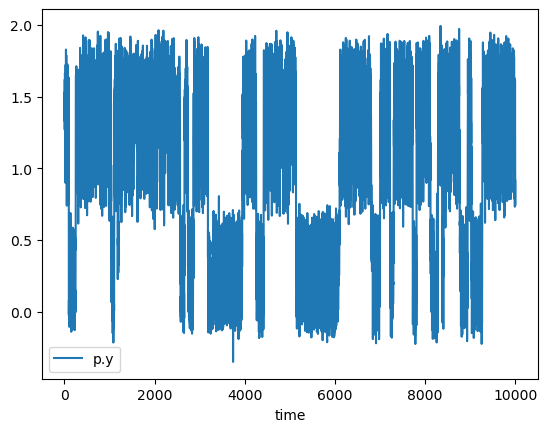

In [9]:
#load 
colvar = load_dataframe(folder+"COLVAR")
print(len(colvar))

# plot pot isolines + samples
_, ax = plt.subplots(1, figsize=(6,5), dpi=100)
ax.contour(xv,yv,pot,10,cmap='Greys_r')
ax.set_title(f'Muller-Brown potential')
colvar.plot.scatter('p.x','p.y',c='opes.bias',cmap='fessa',s=1,ax=ax)
plt.show()

colvar.plot('time','p.y')
plt.show()


### explore - x

In [14]:
folder = 'biased/explore-x/'

Path(folder).mkdir(parents=True, exist_ok=True)

# md_potential for ves_md_linearexpansion (actual potential is in plumed.dat)
with open(folder+"md_potential","w") as f:
    print("""#! FIELDS idx_dim1 idx_dim2 pot.coeffs index description
#! SET type LinearBasisSet
#! SET ndimensions  2
#! SET ncoeffs_total 9 
#! SET shape_dim1  3
#! SET shape_dim2  3
       0       0         0.0000000000000000e+00       0  1*1
#!-------------------
""",file=f)

# md_input for ves_md_linearexpansion
with open(folder+"md_input","w") as f:
    print("""
nstep                   4000000
tstep                   0.005
temperature             1.0
friction                10.0
random_seed             1  
plumed_input            plumed.dat
dimension               2
replicas                1
basis_functions_1       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
basis_functions_2       BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
input_coeffs            md_potential
initial_position        -0.75,1.5
output_potential        out_potential.data
output_potential_grid   100
output_histogram        histogram.data
""",file=f)

with open(folder+"plumed.dat","w") as f:
    print(f"""# vim:ft=plumed
UNITS NATURAL
p: POSITION ATOM=1
ene: CUSTOM ARG=p.x,p.y PERIODIC=NO FUNC={MULLER_BROWN_FORMULA}
pot: BIASVALUE ARG=ene

opes: OPES_METAD_EXPLORE ARG=p.x BARRIER=20 PACE=200

lwall: LOWER_WALLS ARG=p.x KAPPA=1000 AT=-1.3
uwall: UPPER_WALLS ARG=p.x KAPPA=1000 AT=+1.0

PRINT STRIDE=400 ARG=* FILE=COLVAR
""",file=f)

clean(folder)
subprocess.run(f"{PLUMED_EXE} ves_md_linearexpansion < md_input", cwd=folder, shell=True)

Invalid MIT-MAGIC-COOKIE-1 key

Replicas                              1
Cores per replica                     1
Number of steps                       4000000
Timestep                              0.005000
Temperature                           1.000000
Friction                              10.000000
Random seed                           -1
Dimensions                            2
Basis Function 1                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
Basis Function 2                      BF_POWERS ORDER=2 MINIMUM=-4.0 MAXIMUM=+4.0
PLUMED input                          plumed.dat
kBoltzmann taken as 1, use NATURAL_UNITS in the plumed input


CompletedProcess(args='plumed ves_md_linearexpansion < md_input', returncode=0)

10001


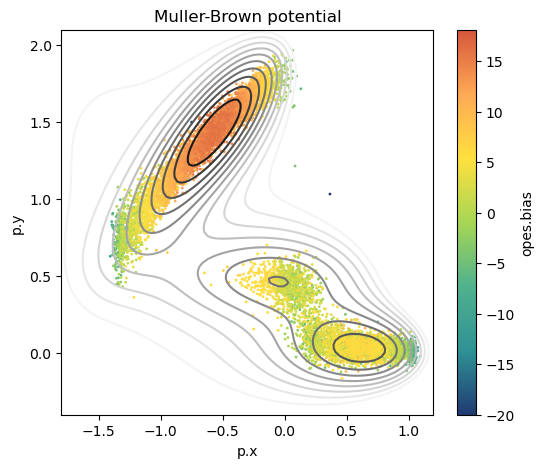

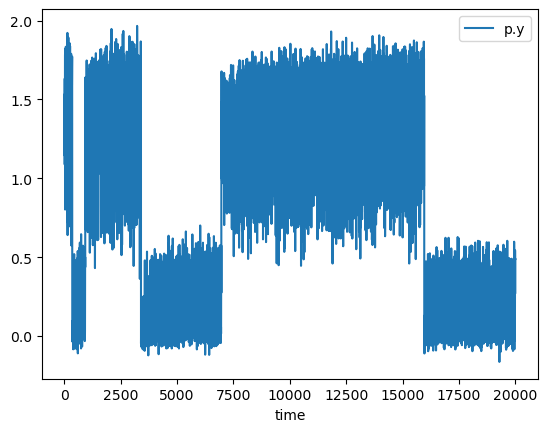

In [23]:
#load 
folder = 'biased/explore-x/'
colvar = load_dataframe(folder+"COLVAR")
print(len(colvar))

# plot pot isolines + samples
_, ax = plt.subplots(1, figsize=(6,5), dpi=100)
ax.contour(xv,yv,pot,10,cmap='Greys_r')
ax.set_title(f'Muller-Brown potential')
colvar.plot.scatter('p.x','p.y',c='opes.bias',cmap='fessa',s=1,ax=ax)
plt.show()

colvar.plot('time','p.y')
plt.show()
